In [0]:
from google.colab import drive,files

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Imports go here
import pickle
import numpy as np
from keras.utils import plot_model
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import Nadam
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, Activation,BatchNormalization
import pandas as pd
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
## test::
pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'
pickletestdata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y3.pkl'
pickleModelC_IngFood ='gdrive/My Drive/DL Project/PickleFiles/pickleModelC_IngFood.pkl' 

In [0]:
pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'
#pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'
#pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'
#pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'


pickletraindata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y3.pkl'
picklevaldata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y3.pkl'
#pickletestdata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y3.pkl'





In [0]:
# Loading train_X

train_X_list = pickle.load(open(pickletraindata_X, 'rb' ))
train_X = np.array(train_X_list)
print(train_X.shape)

#X_shape = train_X.shape[2]*train_X.shape[3]*train_X.shape[4]
#train_X=train_X.reshape(20000,X_shape)
#print(train_X.shape)


(66071, 1, 7, 7, 512)


In [0]:
train_X=train_X.reshape(len(train_X_list),7,7,512)
print(train_X.shape)

(66071, 7, 7, 512)


In [0]:
# Loading train_Y1

train_Y1_list = pickle.load(open(pickletraindata_Y1, 'rb' ))
train_Y1 = np.array(train_Y1_list)
print(train_Y1.shape)

(66071, 172)


In [0]:
# Loading train_Y2

train_Y2_list = pickle.load(open(pickletraindata_Y2, 'rb' ))
train_Y2 = np.array(train_Y2_list)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(66071, 353)


In [0]:
# Loading val_X

val_X_list = pickle.load(open(picklevaldata_X, 'rb' ))
val_X = np.array(val_X_list)
#reshape_val = val_X.shape[2]*val_X.shape[3]*val_X.shape[4]
#val_X=val_X.reshape(3000,7,7,512)
print(val_X.shape)

(11016, 1, 7, 7, 512)


In [0]:
val_X=val_X.reshape(len(val_X_list),7,7,512)
print(val_X.shape)

(11016, 7, 7, 512)


In [0]:
# Loading val_Y1

val_Y1_list = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1_list)
print(val_Y1.shape)

(11016, 172)


In [0]:
# Loading val_Y2

val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0
  
print(val_Y2.shape)

(11016, 353)


In [0]:
# Loading test_X

test_X_list = pickle.load(open(pickletestdata_X, 'rb' ))
test_X = np.array(test_X_list)

print(test_X.shape)
test_X=test_X.reshape(len(test_X_list),7,7,512)
print(test_X.shape)

# Loading test_Y1

test_Y1_list = pickle.load(open(pickletestdata_Y1, 'rb' ))
test_Y1 = np.array(test_Y1_list)
print(test_Y1.shape)


# Loading test_Y2

test_Y2_list = pickle.load(open(pickletestdata_Y2, 'rb' ))
test_Y2 = np.array(test_Y2_list)

for index in range(test_Y2.shape[0]):
  templist = test_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  test_Y2[index] = templist_0


test_Y3_list = pickle.load(open(pickletestdata_Y3,"rb"))
test_Y3 = np.array(test_Y3_list)
print(test_Y3.shape)
  
print(test_Y2.shape)

(33154, 1, 7, 7, 512)
(33154, 7, 7, 512)
(33154, 172)
(33154,)
(33154, 353)


In [0]:
train_Y3_list = pickle.load(open(pickletraindata_Y3,"rb"))
train_Y3 = np.array(train_Y3_list)
print(train_Y3.shape)
val_Y3_list = pickle.load(open(picklevaldata_Y3,"rb"))
val_Y3 = np.array(val_Y3_list)
print(val_Y3.shape)
#test_Y3_list = pickle.load(open(pickletestdata_Y3,"rb"))
#test_Y3 = np.array(test_Y3_list)
#print(test_Y3.shape)

(66071,)
(11016,)


**F1 CUSTOM FUNCTION**

In [0]:
def get_f1(y_true, y_pred): #https://mc.ai/how-to-add-user-defined-function-get-f1-score-in-keras-metrics/
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val



**MODEL C WITH CNN**

In [0]:
def get_f1(y_true, y_pred): #https://mc.ai/how-to-add-user-defined-function-get-f1-score-in-keras-metrics/
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

(?, 353)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 7, 7, 2048)   9439232     input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 7, 7, 2048)   9439232     input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 4, 4, 2048)   0           conv2d_11[0][0]                  
___________________________________________________________________________________

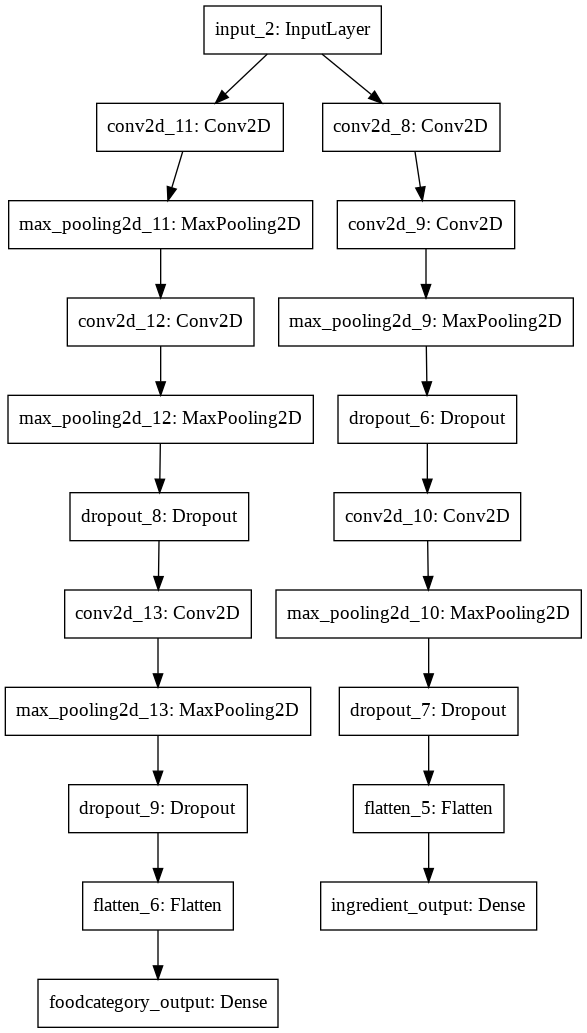

In [0]:
import tensorflow as tf
inputs = Input(shape=(7,7,512))
inputs_1 = Flatten()(inputs)
 
conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(conv2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

flattened3 = Flatten()(dropout3)

conv2D4 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.7)(maxPool2D6)


flattened6 = Flatten()(dropout6)



output1 = Dense(353,activation='sigmoid',name='ingredient_output')(flattened3)  ##  Ingredient recognition
output2 = Dense(172,activation='softmax',name='foodcategory_output')(flattened6) ##  Food categorization
print(output1.shape)


model_C = Model(inputs=inputs, outputs=[output1,output2]) # Defining model with Architecture A3
print(model_C.summary()) # summarize layers
plot_model(model_C, to_file='Multi-task Architecture C.png') # plot graph

In [0]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

model_C.compile(optimizer=Adam(lr=0.00005),
              loss={'ingredient_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[get_f1,top5_acc])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model_C.fit(train_X, [train_Y2,train_Y1], batch_size=256, epochs=40,validation_data = (val_X, [val_Y2, val_Y1]))




Train on 66071 samples, validate on 11016 samples
Epoch 1/40





66071/66071 [==============================] - 75s 1ms/step - loss: 16.0401 - ingredient_output_loss: 0.1091 - foodcategory_output_loss: 15.9310 - ingredient_output_get_f1: 0.0455 - ingredient_output_top5_acc: 0.1543 - foodcategory_output_get_f1: 0.0087 - foodcategory_output_top5_acc: 0.3782 - val_loss: 15.8942 - val_ingredient_output_loss: 0.0401 - val_foodcategory_output_loss: 15.8541 - val_ingredient_output_get_f1: 0.0209 - val_ingredient_output_top5_acc: 0.4493 - val_foodcategory_output_get_f1: 0.0161 - val_foodcategory_output_top5_acc: 0.9986
Epoch 2/40
66071/66071 [==============================] - 61s 929us/step - loss: 15.9125 - ingredient_output_loss: 0.0452 - foodcategory_output_loss: 15.8672 - ingredient_output_get_f1: 0.0866 - ingredient_output_top5_acc: 0.2944 - foodcategory_output_get_f1: 0.0143 - foodcategory_output_top5_acc: 0.5942 - val_loss: 15.8003 - val_ingredient_output_loss: 0.0360 - val_foodcate

In [0]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model_C.to_json()
with open('gdrive/My Drive/DL Project/Models/ModelC_IngFood.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_C.save_weights('gdrive/My Drive/DL Project/Models/ModelC_IngFood.h5')
print("Saved model to disk")


Saved model to disk


In [0]:
from keras.models import model_from_json
# load json and create model
json_file = open('gdrive/My Drive/DL Project/Models/ModelC_IngFood.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('gdrive/My Drive/DL Project/Models/ModelC_IngFood.h5')
print("Loaded model from disk")






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Loaded model from disk


In [0]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'
loaded_model.compile(optimizer=Adam(lr=0.0005),
              loss={'ingredient_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[get_f1,top5_acc])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
results = loaded_model.evaluate(test_X, [test_Y2,test_Y1], batch_size=128)
print(results)

33154/33154 [==============================] - 130s 4ms/step
[1.4474599664184629, 0.02218371260983813, 1.425276251133481, 0.6258339426331521, 0.7186463171864632, 0.7149515375769123, 0.8934065271158834]


In [0]:
## prediction on test

print('Ingredient F1:', results[3])
print('Ingredient Top5:', results[4])
print('Food F1:', results[5])
print('Food Top5:', results[6])


Ingredient F1: 0.6258339426331521
Ingredient Top5: 0.7186463171864632
Food F1: 0.7149515375769123
Food Top5: 0.8934065271158834


In [0]:
print('Generate predictions for all samples')
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

predictions = loaded_model.predict(test_X)

Generate predictions for all samples


In [0]:
predictions_ingredients=1*(predictions[0] >= 0.5)

from sklearn.metrics import classification_report
print(classification_report(test_Y2, predictions_ingredients))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67      6698
           1       0.65      0.55      0.59       666
           2       0.43      0.26      0.32       731
           3       0.64      0.73      0.68       144
           4       0.72      0.67      0.70       435
           5       0.43      0.30      0.35        10
           6       1.00      0.08      0.15        24
           7       0.17      0.02      0.04        46
           8       0.63      0.68      0.65       868
           9       0.57      0.30      0.39       365
          10       0.31      0.10      0.15        41
          11       0.67      0.48      0.56       699
          12       0.59      0.40      0.48       387
          13       0.59      0.44      0.51      1639
          14       0.70      0.51      0.59        76
          15       0.66      0.55      0.60      4353
          16       0.47      0.52      0.49      1138
          17       0.51    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
